In [10]:
from astropy.visualization import MinMaxInterval, AsinhStretch, ImageNormalize
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
existing_fits_path = '/home/jwp/stage/sl/SLSprinkler/image_verification/image2_bulge.fits'
image_file = get_pkg_data_filename(existing_fits_path)
img = fits.getdata(image_file, ext=0)

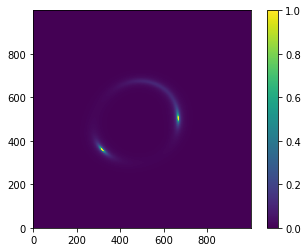

In [12]:
plt.imshow(img, origin='lower')
plt.colorbar()

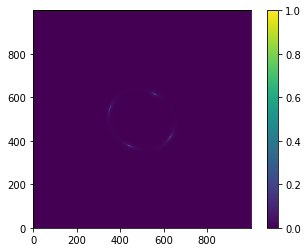

In [13]:
sys_id = 4077543
val_img_path = '/home/jwp/stage/sl/SLSprinkler/image_verification/validation_{0:07d}.npy'.format(sys_id)
val_img = np.load(val_img_path)
plt.imshow(val_img, origin='lower')
plt.colorbar()